In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import platform
import pickle as pkl

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'



In [2]:
df_qna = pd.read_csv('../data/wiggle.qna.csv')

In [3]:
df_product = pd.read_csv('../data/wiggle.product.csv')

In [4]:
with open('../data/pickles/df_salesBasic.pkl', "rb") as file:
    df_salesBasic = pickle.load(file)

## 데이터 전처리

### 결측치 변환 / id열 제거

In [5]:
df_qna = df_qna.fillna('-')

In [6]:
df_product = df_product.drop(columns='_id')

### 상품 카테고리 번호 지정

In [7]:
df_product['catagory_index'] = df_product.index.to_list()
df_product['full_category'] = df_product['large_category'] + ' ' + df_product['middle_category'] + ' ' + df_product['small_category']

### qna 상품 카테고리 번호 지정

In [8]:
# 카테고리 부여 함수 제작
def get_category(getlist,issame,fullcate):
    category_list = []
    cate_name_list = []
    issame = issame.to_list()
    for i in getlist:
        if i == '-':
            category_list.append(np.nan)
            cate_name_list.append(np.nan)
        elif i in issame:
            category_list.append(int(issame.index(i)))
            cate_name_list.append(fullcate.iloc[int(issame.index(i))])
        else:
            category_list.append('판매종료상품')
            cate_name_list.append('판매종료상품')

    large_category =[]
    middle_category = []
    small_category = []

    for i in cate_name_list:
        try:
            temp_list = i.split(' ')
        except:
            temp_list = []

        if len(temp_list) != 3:
            large_category.append(np.nan)
            middle_category.append(np.nan)
            small_category.append(np.nan)
        else:
            large_category.append(temp_list[0])
            middle_category.append(temp_list[1])
            small_category.append(temp_list[2])

    return category_list, cate_name_list,large_category,middle_category,small_category

In [9]:
df_qna['get_category'], df_qna['category_name'],df_qna['large_category'],df_qna['middle_category'],df_qna['small_category'] = get_category(df_qna['product_name'],df_product['title'],df_product['full_category'])

- 월별 날짜 묶기

In [10]:
df_qna['date'] = df_qna['date'].apply(lambda x : pd.to_datetime(x).strftime("%Y-%m"))

In [11]:
df_qna[:5]

,_id,index_num,product_href,product_name,category,customer_name,date,get_category,category_name,large_category,middle_category,small_category
0,6631b8fae29b6ec61bcab039,23134,https://wiggle-wiggle.com/product/$1/$2/,-,상품 문의,나****,2024-05,NaN,NaN,NaN,NaN,NaN
1,6631b8fae29b6ec61bcab03a,23133,https://wiggle-wiggle.com/product/$1/$2/,-,교환/환불 문의,김****,2024-05,NaN,NaN,NaN,NaN,NaN
2,6631b8fbe29b6ec61bcab03b,23132,https://wiggle-wiggle.com/product/%EB%B3%B4%EA...,[보그스X위글위글] 아동용 레인부츠 - BLUE,상품 문의,박****,2024-05,142,fashion 신발 -,fashion,신발,-
3,6631b8fbe29b6ec61bcab03c,23131,https://wiggle-wiggle.com/product/%ED%92%80%EB...,풀림방지 실리콘참 3 SET - Cherry,상품 문의,박****,2024-05,162,fashion 액세서리 실리콘참,fashion,액세서리,실리콘참
4,6631b8fbe29b6ec61bcab03d,23130,https://wiggle-wiggle.com/product/sk%EB%A7%A4%...,[SK매직X위글위글] 미니 정수기,상품 문의,김****,2024-05,272,electronics - -,electronics,-,-


### 카테고리 별 문의 수

In [12]:
df_qna.value_counts('large_category').index

Index(['fashion', 'living', 'digital', 'outdoor', 'family', 'collabo',
       'electronics'],
      dtype='object', name='large_category')

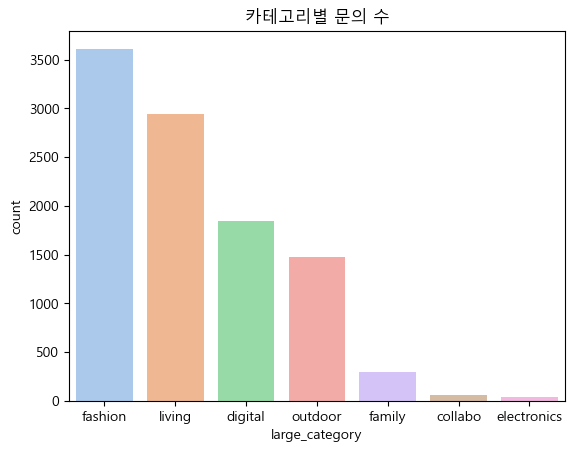

In [77]:
orders = df_qna.value_counts('large_category').index
sns.countplot(data=df_qna, x='large_category', palette='pastel',order=orders)

plt.title('카테고리별 문의 수')
plt.show()

### 상품 별 문의 수

In [27]:
df_qna.value_counts('product_name').index[1:11]

Index(['[앱코X위글위글] 키보드 - Color Mix', '보냉백(S/L) - Smile We Love', '레디백',
       '보냉백(L) - Smile We Love', '파자마 세트(롱) - Cherry', '[벨리곰X위글위글] 쿠션담요',
       '[벨리곰X위글위글] 실리콘참(S) - 2종 SET', '자수케이스 - Drunken Cats',
       '라운지 로브  - Teddy Bear', '투명우산 - Smile We Love'],
      dtype='object', name='product_name')

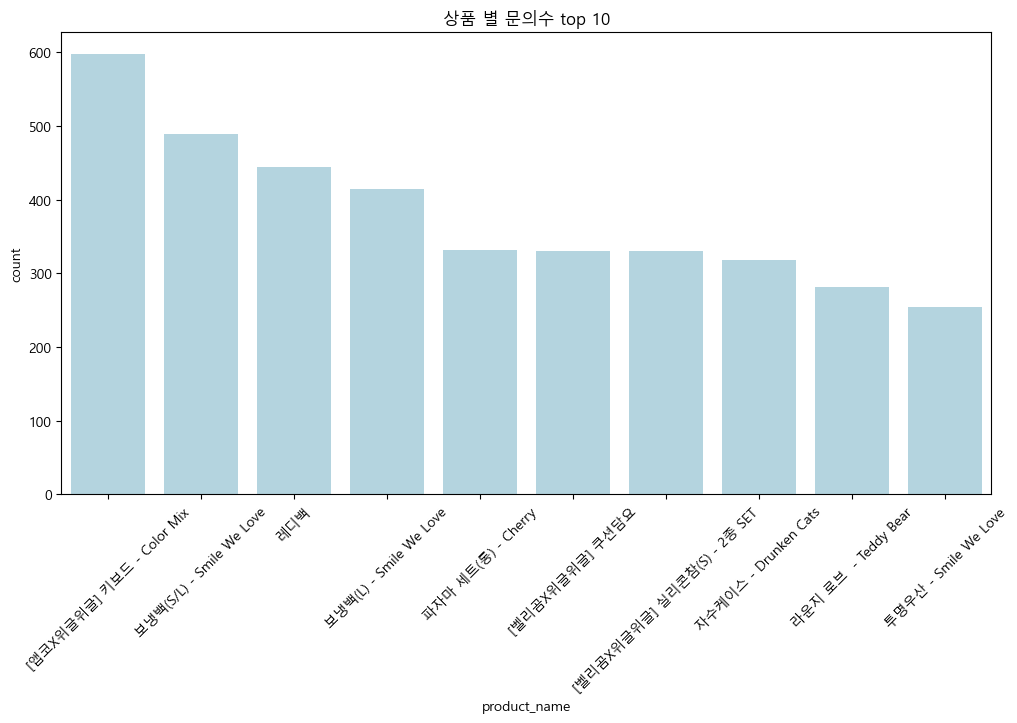

In [35]:
plt.figure(figsize=(12, 6))


order = df_qna.value_counts('product_name').index[1:11]
sns.countplot(data=df_qna, x='product_name', order=order, color='lightblue')

plt.title('상품 별 문의수 top 10')
plt.xticks(rotation=45)
plt.show()

### 문의 종류

In [36]:
df_qna.value_counts('category')[:10]


category
상품 문의       14387
배송 문의        2278
기타 문의        2185
교환/환불 문의     1806
재입고           586
재입고문의         367
재입고 문의        315
취소 문의         277
기타            231
배송문의           94
Name: count, dtype: int64

In [37]:
category_counts = {
    "상품 문의": 14387,
    "배송 문의": 2278,
    "기타": 2185 + 231,
    "교환/환불 문의": 1806,
    "취소 문의": 277,
    "재입고 문의": 586 + 367 + 315
}

In [42]:
df_kindqna = pd.DataFrame(list(category_counts.items()), columns=['문의 종류', 'count'])

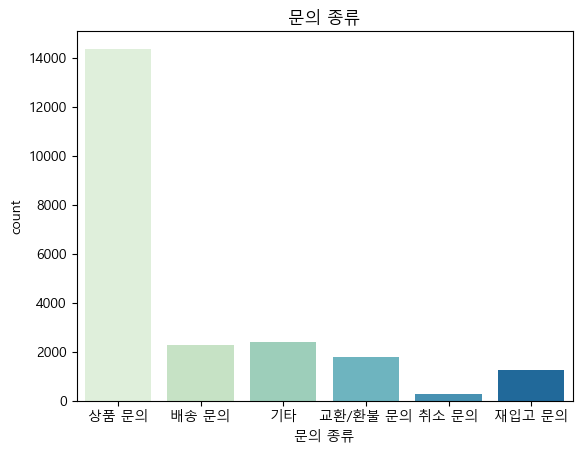

In [45]:
sns.barplot(data=df_kindqna,x='문의 종류',y='count',palette='GnBu')

plt.title('문의 종류')
plt.show()

### 기간별 문의 수

In [16]:
df_qna.value_counts('date')

date
2023-02    2118
2023-07    2098
2022-08    2018
2022-12    1599
2023-09    1566
2023-12    1351
2024-02    1306
2022-09    1167
2024-03    1079
2023-04    1021
2023-08     975
2023-05     939
2023-06     890
2022-10     881
2022-11     880
2023-10     816
2023-11     773
2023-03     741
2023-01     712
2024-04     673
2024-01     670
2022-07     101
2021-09      82
2024-05       9
Name: count, dtype: int64

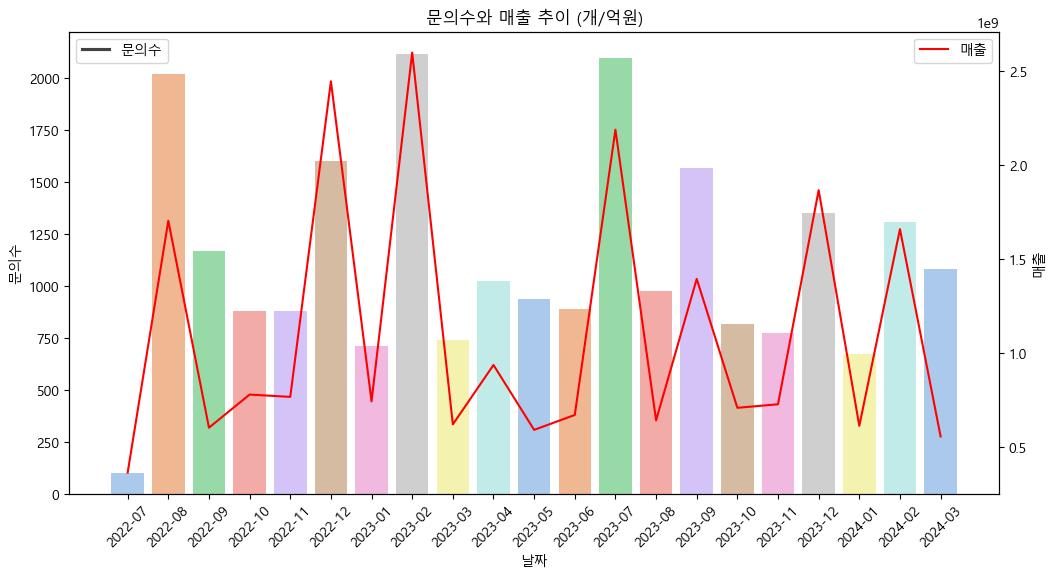

In [17]:
plt.figure(figsize=(12, 6))

# 뉴스 개수를 시간에 따라 추이를 보여주는 바플롯
news_counts = df_qna.query('date >= "2022-03" & date <= "2024-03"').groupby('date').size()
sns.barplot(x=news_counts.index, y=news_counts, palette='pastel')

plt.title('문의수와 매출 추이 (개/억원)')
plt.xlabel('날짜')
plt.ylabel('문의수')
plt.xticks(rotation=45)
plt.legend(['문의수'], loc='upper left')

# 두 번째 축 설정
ax2 = plt.gca().twinx()
ax2.set_ylabel('매출')

# 매출 데이터를 시간에 따라 추이를 보여주는 라인 플롯
sales_data = df_salesBasic.query('referenceMonth >= "2022-07" & referenceMonth <= "2024-03"')
sns.lineplot(data=sales_data, x='referenceMonth', y='inCome', color='red', ax=ax2)

plt.legend(['매출'], loc='upper right')
plt.show()

## 상품

In [65]:
df_product.query('large_category == "electronics"')

,large_category,middle_category,small_category,image_url,title,old_price,new_price,discount_rate,review_count,isSoldout,catagory_index,full_category
272,electronics,-,-,https://cafe24img.poxo.com/wigglewiggle20/web/...,[SK매직X위글위글] 미니 정수기,199000,199000,NaN,NaN,False,272,electronics - -
273,electronics,-,-,https://cafe24img.poxo.com/wigglewiggle20/web/...,[SK매직X위글위글] 초소형 직수 정수기,39900,43900,NaN,NaN,False,273,electronics - -


In [64]:
df_product['old_price'].iloc[273] = 39900
df_product['new_price'].iloc[273] = 43900

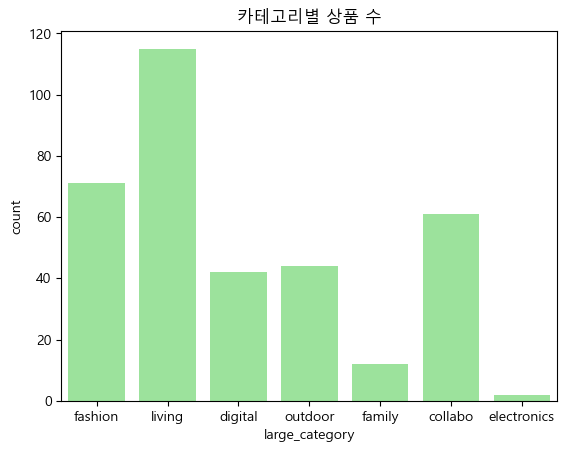

In [78]:
sns.countplot(data=df_product,x='large_category',order=orders,color='lightgreen')

plt.title('카테고리별 상품 수')
plt.show()

In [53]:
df_product['new_price'] =df_product['new_price'].apply(int)

In [67]:
df_categoryMean = df_product.groupby('large_category')['new_price'].mean()

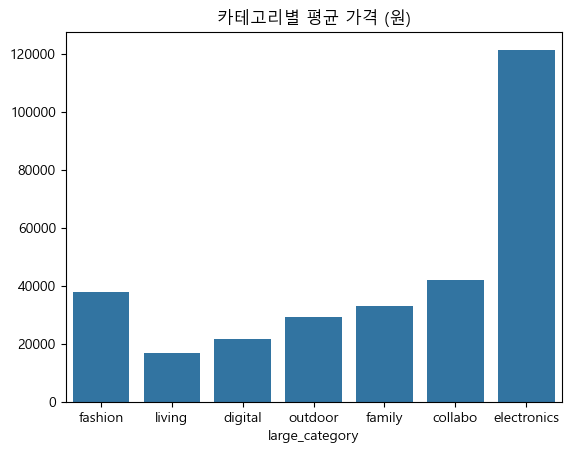

In [79]:
sns.barplot(data=df_categoryMean.to_frame(), x=df_categoryMean.index, y=df_categoryMean.values,order=orders)

plt.title('카테고리별 평균 가격 (원)')
plt.show()

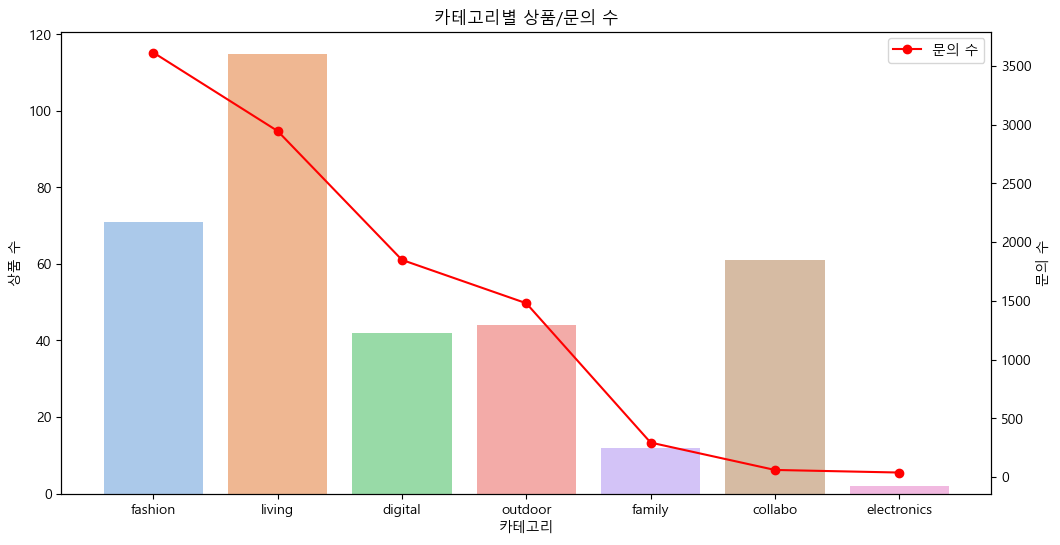

In [103]:
plt.figure(figsize=(12, 6))

# 바플롯 그리기
sns.countplot(data=df_product, x='large_category', palette='pastel', order=orders)
plt.title('카테고리별 상품/문의 수')
plt.xlabel('카테고리')
plt.ylabel('상품 수')

# 문의 수를 라인 플롯으로 추가하기
ax2 = plt.gca().twinx()
qna_counts = df_qna['large_category'].value_counts().loc[orders]
qna_counts.plot(kind='line', color='red', ax=ax2,marker='o')
ax2.set_ylabel('문의 수')

# 범례 추가
plt.legend(['문의 수'], loc='upper right')

plt.show()

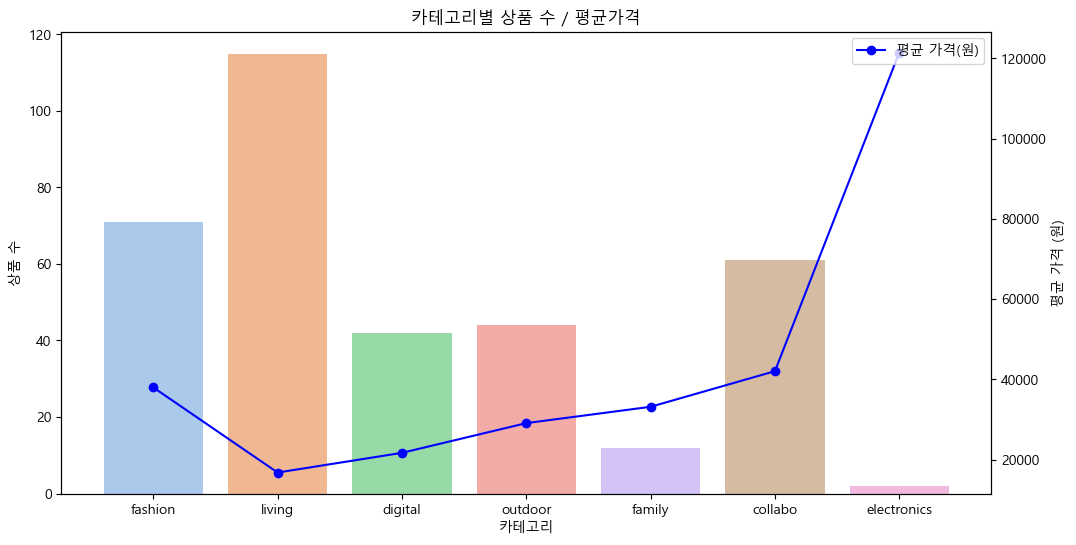

In [105]:
plt.figure(figsize=(12, 6))

# 첫 번째 축에 바플롯 그리기
sns.countplot(data=df_product, x='large_category', order=orders, palette='pastel')
plt.title('카테고리별 상품 수 / 평균가격')
plt.xlabel('카테고리')
plt.ylabel('상품 수')

# 두 번째 축에 평균 가격을 라인 플롯으로 추가하기
df_categoryMean_sorted = df_categoryMean.loc[orders]
ax2 = plt.gca().twinx()
df_categoryMean_sorted.plot(kind='line', color='blue', marker='o', ax=ax2)
ax2.set_ylabel('평균 가격 (원)')
# 범례 추가
plt.legend(['평균 가격(원)'], loc='upper right')

plt.show()

In [126]:
with open("../data/pickles/df_product.pkl", "wb") as f:
    pkl.dump(df_product, f)